In [14]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
import numpy as np
%matplotlib inline

# Admissions

Links to: PATIENTS on SUBJECT_ID
    
## Brief summary

The ADMISSIONS table gives information regarding a patient’s admission to the hospital. Since each unique hospital visit for a patient is assigned a unique HADM_ID, the ADMISSIONS table can be considered as a definition table for HADM_ID. Information available includes timing information for admission and discharge, demographic information, the source of the admission, and so on.

The ADMISSIONS table defines all HADM_ID present in the database, covering an admission period between 1 June 2001 and 10 October 2012.


In [52]:
admissions =  pd.read_csv("Downloads/ADMISSIONS.csv")

In [5]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [12]:
#get the number of unique values in each columns
admissions.apply(pd.Series.nunique)

ROW_ID                  58976
SUBJECT_ID              46520
HADM_ID                 58976
ADMITTIME               58651
DISCHTIME               58657
DEATHTIME                5834
ADMISSION_TYPE              4
ADMISSION_LOCATION          9
DISCHARGE_LOCATION         17
INSURANCE                   5
LANGUAGE                   75
RELIGION                   20
MARITAL_STATUS              7
ETHNICITY                  41
EDREGTIME               30874
EDOUTTIME               30864
DIAGNOSIS               15691
HOSPITAL_EXPIRE_FLAG        2
HAS_CHARTEVENTS_DATA        2
dtype: int64

In [64]:
admissions.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

Missing values for religion, langual, marital status would be 'other', diagnoses ones should be looked at.
Regist and Out time missing could be a problem with LOS prediction, and we may remove those points for training purpose

We can look into it later for each attributes the count of their distinct values

@Questions that are interesting: What variables predict certain outcomes, for instance:
a) Does language/ethnicity/martial status/religion/insurance make a difference in readmission (are people unable to follow discharge follow up care) - does certain diagnoses get different follow up care  because of any of these attributes
b)Does time of the day make a differenc (can't do much with date and time)


## Important considerations

The data is sourced from the admission, discharge and transfer database from the hospital (often referred to as ‘ADT’ data).
Organ donor accounts are sometimes created for patients who died in the hospital. These are distinct hospital admissions with very short, sometimes negative lengths of stay. Furthermore, their DEATHTIME is frequently the same as the earlier patient admission’s DEATHTIME.
All text data, except for that in the INSURANCE column, is stored in upper case.

In [52]:
#clean organ donors
#Find all patients with negative length of stay
#what's MINSTAY =?? Research and fill in

#@todo
#admissions_noOrganDonors = admissions[admissions["LOS"] > MINSTAY]


### CREATE READMISSION VAR

#### SUBJECT_ID, HADM_ID

Each row of this table contains a unique HADM_ID, which represents a single patient’s admission to the hospital. HADM_ID ranges from 1000000 - 1999999. It is possible for this table to have duplicate SUBJECT_ID, indicating that a single patient had multiple admissions to the hospital. The ADMISSIONS table can be linked to the PATIENTS table using SUBJECT_ID.

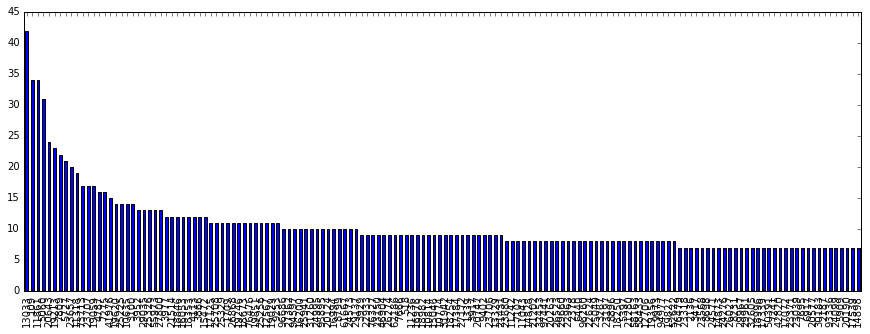

In [62]:
## So let's find out if a patient ever gets readmitted
## and how many times

readmissionTimes = admissions['SUBJECT_ID'].value_counts()

readmissionTimes.head(150).plot(kind='bar', figsize = (15, 5))



count    46520.000000
mean         1.267756
std          0.892498
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         42.000000
Name: SUBJECT_ID, dtype: float64
38983
1     38983
2      5160
3      1342
4       508
5       246
6       113
7        51
8        31
9        26
10       14
11       13
12        8
13        5
14        4
17        3
16        2
34        2
24        1
42        1
15        1
19        1
20        1
21        1
22        1
23        1
31        1
Name: SUBJECT_ID, dtype: int64


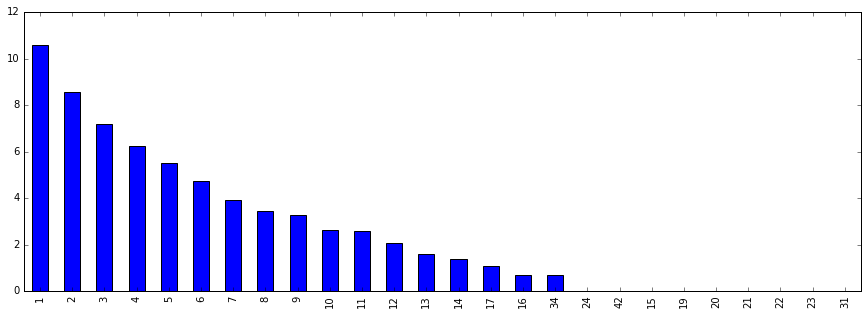

In [87]:
print readmissionTimes.describe()
print readmissionTimes[readmissionTimes == 1].count()


# how many people are in each bucket
patternOfPatientsReadmittedNumbers = readmissionTimes.value_counts()
print patternOfPatientsReadmittedNumbers
import numpy as np
np.log(patternOfPatientsReadmittedNumbers).plot(kind='bar', figsize = (15, 5)) 
    
#Mean length of stay

### ADMITTIME, DISCHTIME, DEATHTIME

ADMITTIME provides the date and time the patient was admitted to the hospital, while DISCHTIME provides the date and time the patient was discharged from the hospital. If applicable, DEATHTIME provides the time of in-hospital death for the patient. Note that DEATHTIME is only present if the patient died in-hospital, and is almost always the same as the patient’s DISCHTIME. However, there can be some discrepancies due to typographical errors.


In [7]:
##Let's find out how many of them died
##how many of them died in hospital vs outside
## ratio of death in hospital vs readmission times (adm > 1)
# same as above those who die outside of hospital

admissions['admTime'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['dischTime'] = pd.to_datetime(admissions['DISCHTIME'])
admissions['deathTime'] = pd.to_datetime(admissions['DEATHTIME'])
admissions['losDays'] = admissions['dischTime'] - admissions['admTime']
admissions['los'] = admissions['losDays'] / np.timedelta64(1, 'D')



# @todo research Should we round it to floor or ceil??
admissions['losRound'] = np.round(admissions['losDays'] / np.timedelta64(1, 'D'))

In [8]:
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,admTime,dischTime,deathTime,losDays,los,losRound
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,1 days 03:28:00,1.144444,1.0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,5 days 11:55:00,5.496528,5.0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,NaN,BRAIN MASS,0,1,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,6 days 18:26:00,6.768056,7.0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,2 days 20:34:00,2.856944,3.0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,3 days 12:49:00,3.534028,4.0


count    58976.000000
mean        10.152706
std         12.467928
min         -1.000000
25%          4.000000
50%          6.000000
75%         12.000000
max        295.000000
Name: losRound, dtype: float64


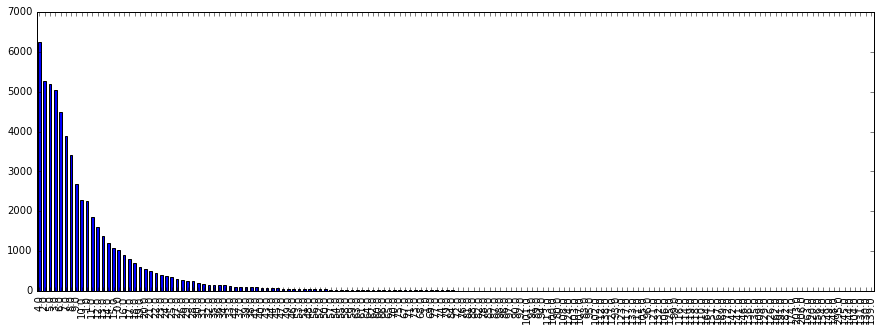

In [19]:
print admissions['losRound'].describe() #.plot(kind='bar', figsize = (15, 5)) 
admissions['losRound'].value_counts().plot(kind='bar', figsize = (15, 5)) 

##whoa... max 295?? are they chronic patients

### EDREGTIME, EDOUTTIME

Time that the patient was registered and discharged from the emergency department.



In [10]:
## How is this related to people dying?
## Get LOS
## If there are any correlation of it with other factors
## A Linear model of LOS with dummy var after consolidating and cleaning the data
admissions['regTime'] = pd.to_datetime(admissions['EDREGTIME'])
admissions['outTime'] = pd.to_datetime(admissions['EDOUTTIME'])
admissions['totalTimeStay'] =  np.round((admissions['outTime'] - admissions['regTime'])/np.timedelta64(1, 'D'))

count    30877.000000
mean         0.054571
std          0.286425
min        -29.000000
25%               NaN
50%               NaN
75%               NaN
max          3.000000
Name: totalTimeStay, dtype: float64


C:\Users\Sahab\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


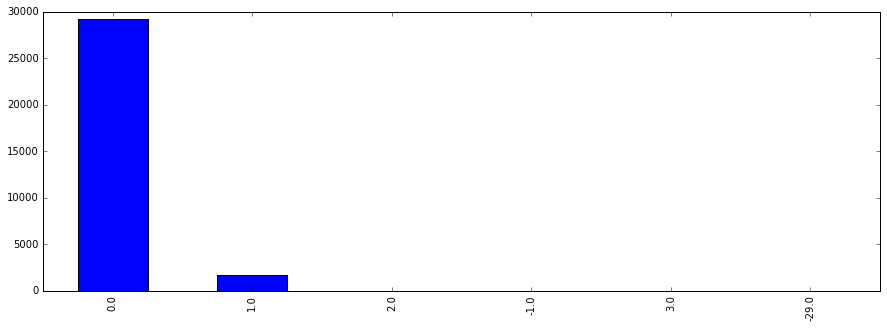

In [20]:
print admissions['totalTimeStay'].describe() #.plot(kind='bar', figsize = (15, 5)) 
admissions['totalTimeStay'].value_counts().plot(kind='bar', figsize = (15, 5)) 

#makes sense to keep total hours in ICU instead of today days

count    30877.000000
mean         5.743952
std          5.648792
min       -696.000000
25%               NaN
50%               NaN
75%               NaN
max         70.000000
Name: totalTimeStay, dtype: float64


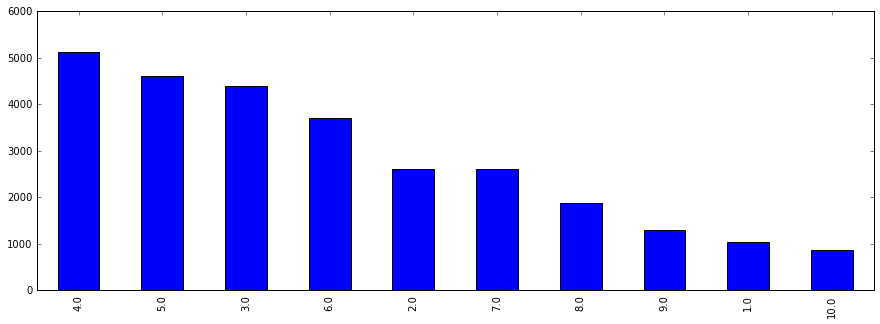

In [31]:
admissions['totalTimeStay'] =  np.round((admissions['outTime'] - admissions['regTime'])/np.timedelta64(1, 'h'))
print admissions['totalTimeStay'].describe() #.plot(kind='bar', figsize = (15, 5)) 
admissions['totalTimeStay'].value_counts().head(10).plot(kind='bar', figsize = (15, 5)) 

### ADMISSION_LOCATION

ADMISSION_LOCATION provides information about the previous location of the patient prior to arriving at the hospital. There are 9 possible values:

EMERGENCY ROOM ADMIT,
TRANSFER FROM HOSP/EXTRAM,
TRANSFER FROM OTHER HEALT,
CLINIC REFERRAL/PREMATURE,
INFO NOT AVAILABLE,
TRANSFER FROM SKILLED NUR,
TRSF WITHIN THIS FACILITY,
HMO REFERRAL/SICK,
PHYS REFERRAL/NORMAL DELI

The truncated text occurs in the raw data.

In [88]:
#
admissions.ADMISSION_LOCATION.value_counts()

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

In [ ]:
def consolidateLoc(row):
    transfer = ["TRANSFER FROM HOSP/EXTRAM", "TRANSFER FROM SKILLED NUR", "TRANSFER FROM OTHER HEALT", "TRSF WITHIN THIS FACILITY"]
    #referral let's keep normal and premature separate
    if (row in transfer):
        return "TRANSFER"
    elif (row == 'HMO REFERRAL/SICK'):
        return "PHYS REFERRAL/NORMAL DELI"
    else:
        return row
    

## DIAGNOSIS

The DIAGNOSIS column provides a preliminary, free text diagnosis for the patient on hospital admission. The diagnosis is usually assigned by the admitting clincian and does not use a systematic ontology. As of MIMIC-III v1.0 there were 15,693 distinct diagnoses for 58,976 admissions. The diagnoses can be very informative (e.g. chronic kidney failure) or quite vague (e.g. weakness). Final diagnoses for hospital admissions are coded and can be found in the DIAGNOSES_ICD table.

### The diagnoses_icd table

Table source: Hospital database.

Table purpose: Contains ICD diagnoses for patients, most notably ICD-9 diagnoses.

Number of rows: 651,047

Links to:

PATIENTS on SUBJECT_ID
ADMISSIONS on HADM_ID
D_ICD_DIAGNOSES on ICD9_CODE

### The d_icd_diagnoses table

Table source: Online sources.

Table purpose: Definition table for ICD diagnoses.

Number of rows: 14,567

Links to:

DIAGNOSES_ICD ON ICD9_CODE
Brief summary

This table defines International Classification of Diseases Version 9 (ICD-9) codes for diagnoses. These codes are assigned at the end of the patient’s stay and are used by the hospital to bill for care provided.



In [21]:
#Lets explore diagnoses in admissions table

#What are the top diagnoses

diagnoses = admissions.DIAGNOSIS.value_counts()
diagnoses.head(60)

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA      450
S/P FALL  

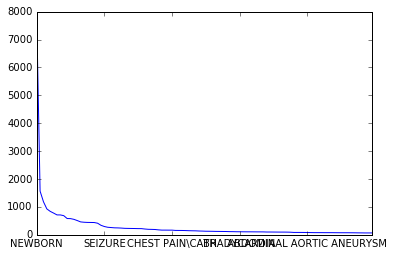

In [25]:
%matplotlib inline
diagnoses.head(100).plot()

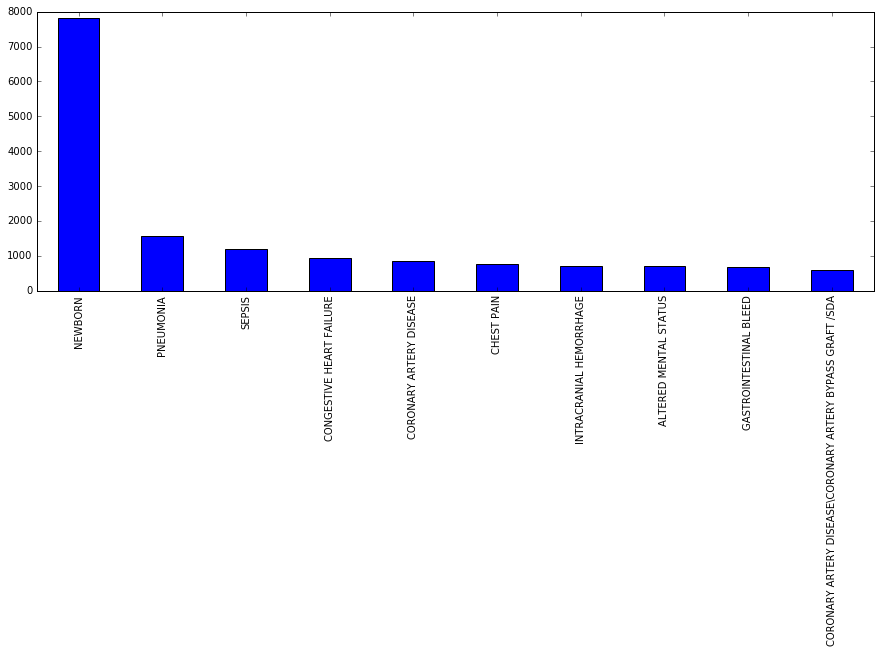

In [27]:
diagnoses.head(10).plot(kind='bar', figsize = (15, 5))

In [33]:
diagnoses[diagnoses == 1].count()

13143

In [36]:
diagnoses.value_counts()

1       13143
2        1053
3         408
4         210
5         129
6         111
7          79
8          60
9          41
10         41
11         36
15         22
17         21
14         19
12         16
16         14
13         14
19         13
23         12
22         11
28         11
25          9
32          8
18          7
20          7
27          7
21          6
24          6
46          5
36          5
        ...  
119         1
127         1
207         1
125         1
109         1
93          1
147         1
250         1
442         1
450         1
554         1
778         1
43          1
59          1
75          1
83          1
247         1
155         1
69          1
227         1
76          1
84          1
108         1
156         1
260         1
444         1
580         1
7823        1
45          1
99          1
Name: DIAGNOSIS, dtype: int64

## @todo USE diagnoses code to get the billing diagnoses and revisit these

@todo LOOK at readmissions and los for these diagnoses

## ADMISSION TYPE

ADMISSION_TYPE describes the type of the admission: ‘ELECTIVE’, ‘URGENT’, ‘NEWBORN’ or ‘EMERGENCY’. Emergency/urgent indicate unplanned medical care, and are often collapsed into a single category in studies. Elective indicates a previously planned hospital admission. Newborn indicates that the HADM_ID pertains to the patient’s birth.4

@todo get rid of newborn admission type
@todo consolodate urgent and emergency -> Only two types of admissions

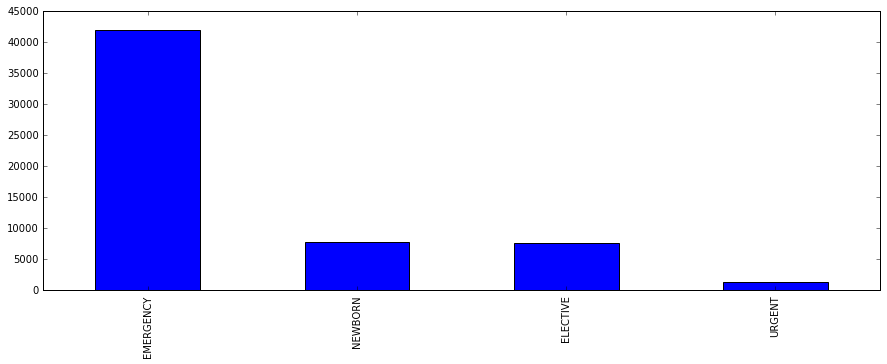

In [42]:
#Lets explore admission type in admissions table

admissions.ADMISSION_TYPE.value_counts().plot(kind='bar', figsize = (15, 5))

##@@ todo create pivot table for top 10 diagnoses for each type
#@todo LOOK at readmissions and los for these types

## Other attributes

INSURANCE, LANGUAGE, RELIGION, MARITAL_STATUS, ETHNICITY

The INSURANCE, LANGUAGE, RELIGION, MARITAL_STATUS, ETHNICITY columns describe patient demographics. These columns occur in the ADMISSIONS table as they are originally sourced from the admission, discharge, and transfers (ADT) data from the hospital database. The values occasionally change between hospital admissions (HADM_ID) for a single patient (SUBJECT_ID). This is reasonable for some fields (e.g. MARITAL_STATUS, RELIGION), but less reasonable for others (e.g. ETHNICITY).

@todo if marital_status /religion change has any effect

#### Religion

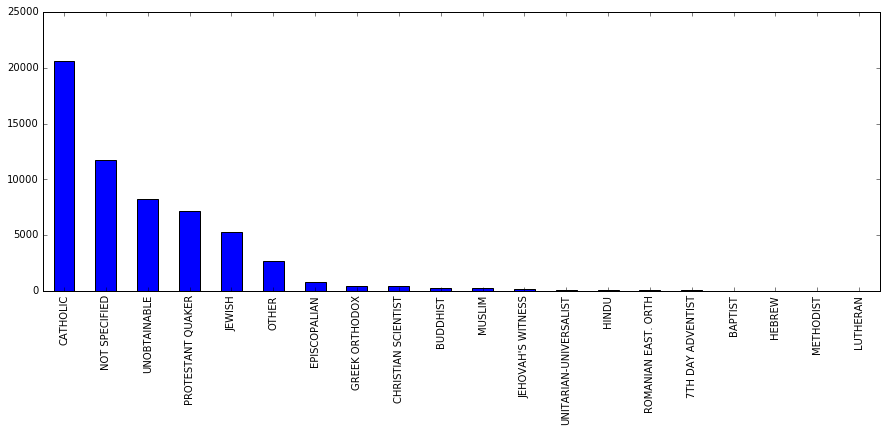

In [43]:
admissions.RELIGIONHAS_CHARTEVENTS_DATA        2

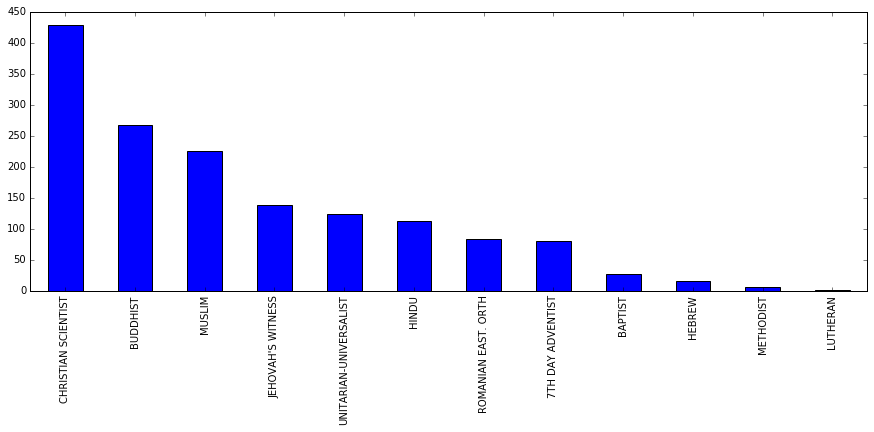

In [33]:
admissions.RELIGION.value_counts().tail(12).plot(kind='bar', figsize = (15, 5))

#### INSURANCE

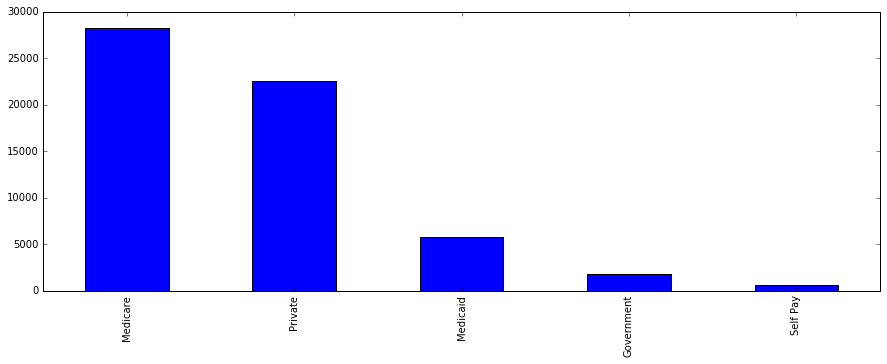

In [45]:
admissions.INSURANCE.value_counts().plot(kind='bar', figsize = (15, 5))

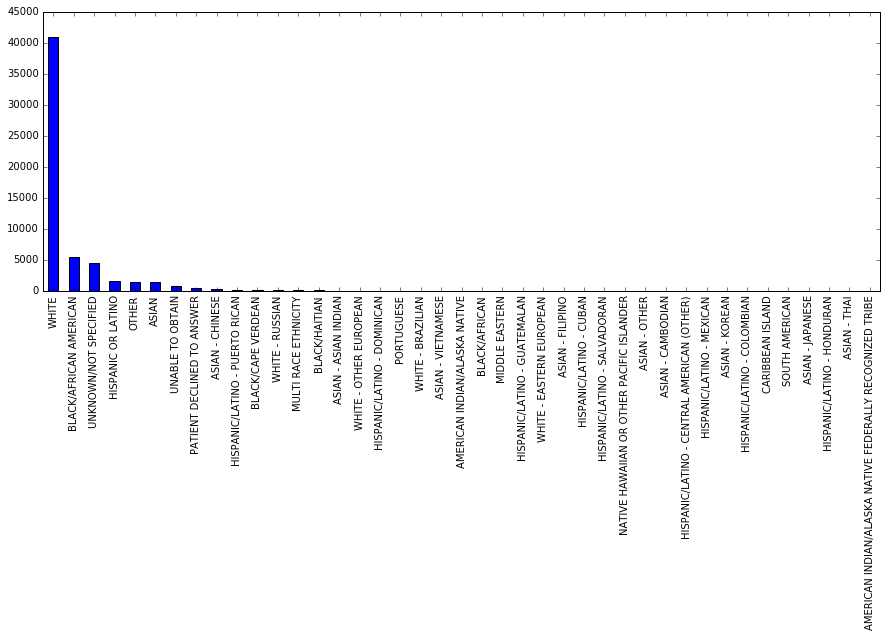

In [47]:
admissions.ETHNICITY.value_counts().plot(kind='bar', figsize = (15, 5))

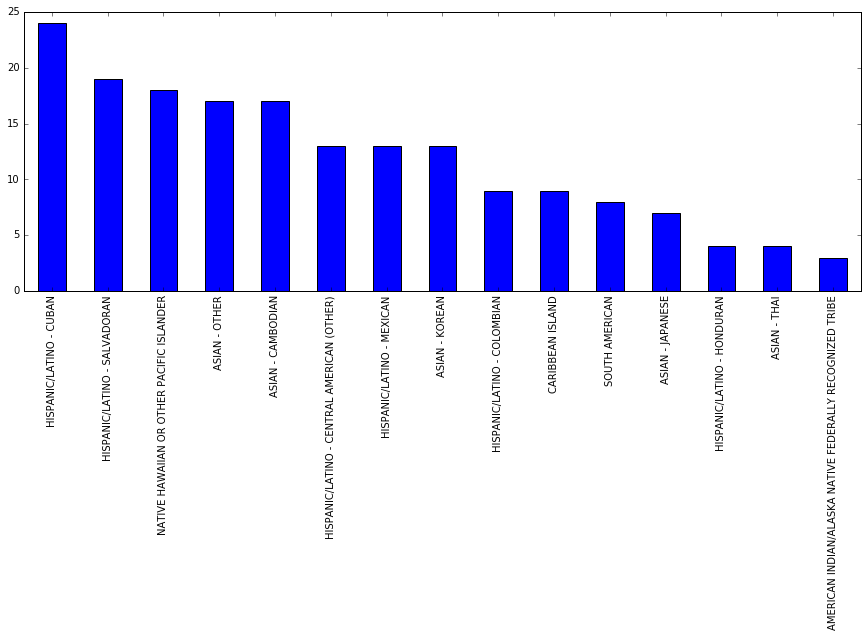

In [34]:
admissions.ETHNICITY.value_counts().tail(15).plot(kind='bar', figsize = (15, 5))

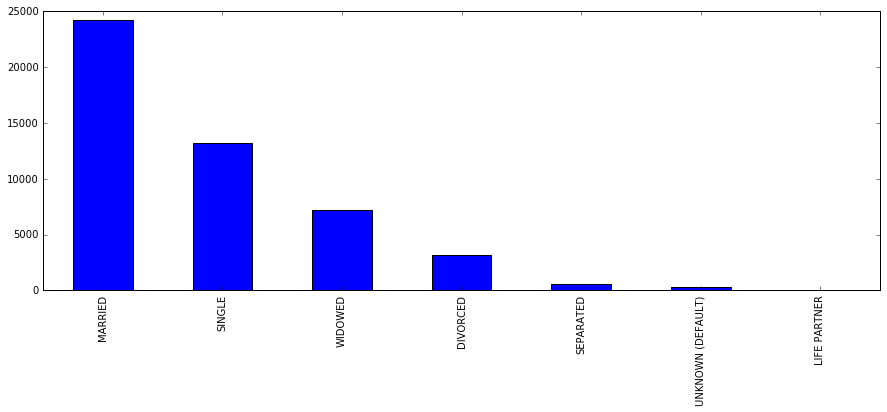

In [49]:
admissions.MARITAL_STATUS.value_counts().plot(kind='bar', figsize = (15, 5))

In [51]:
admissions.LANGUAGE.value_counts()

ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
PORT      342
CAPE      256
MAND      156
HAIT      150
ITAL      124
VIET       94
GREE       75
ARAB       47
PERS       44
CAMB       37
POLI       34
AMER       31
HIND       24
KORE       23
ALBA       17
FREN       16
SOMA       13
THAI       12
ETHI       11
*ARM        9
*BEN        7
*YID        7
LAOT        7
*HUN        7
*CHI        7
        ...  
*FUL        2
*TOI        2
*AMH        2
BENG        2
*KHM        2
*TOY        2
TURK        2
*DUT        2
**SH        2
* BE        2
*PER        1
*TAM        1
*LIT        1
** T        1
*NEP        1
*ROM        1
*BOS        1
*PHI        1
* FU        1
*PUN        1
*CRE        1
GERM        1
*ARA        1
*FIL        1
*DEA        1
*YOR        1
SERB        1
*RUS        1
*SPA        1
*FAR        1
Name: LANGUAGE, dtype: int64

In [55]:
admissions.HAS_CHARTEVENTS_DATA.value_counts()
#admissions.head(1)

1    57384
0     1592
Name: HAS_CHARTEVENTS_DATA, dtype: int64

In [62]:
## let's see if anything abnormal about that data
admissions[admissions['HAS_CHARTEVENTS_DATA'] == 0].head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
69,67,67,186474,2155-02-25 12:45:00,2155-03-06 15:00:00,NaN,URGENT,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,JEWISH,SINGLE,WHITE,NaN,NaN,INCISIONAL HERNIA,0,0
87,85,84,120969,2196-02-02 07:15:00,2196-02-04 17:48:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,OTHER,MARRIED,WHITE,NaN,NaN,MEDIAL PARIETAL TUMOR/SDA,0,0
143,182,135,199634,2174-05-17 09:00:00,2174-05-21 14:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,NaN,PROTESTANT QUAKER,DIVORCED,WHITE,NaN,NaN,THORACIC MYELOPATHY/SDA,0,0
231,379,299,175259,2176-06-26 10:45:00,2176-06-29 17:30:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Government,ENGL,UNOBTAINABLE,SINGLE,ASIAN,NaN,NaN,NEWBORN,0,0
261,409,323,192631,2115-05-17 21:06:00,2115-05-27 13:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SHORT TERM HOSPITAL,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,2115-05-17 13:40:00,2115-05-17 22:37:00,ACUTE MI,0,0
272,420,330,184134,2132-01-15 07:15:00,2132-01-17 10:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,SINGLE,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,0
298,446,352,152913,2145-04-07 03:32:00,2145-04-14 13:19:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,WHITE,2145-04-07 01:49:00,2145-04-07 04:32:00,LT LEG ISCHEMIA,0,0
368,638,510,166097,2150-11-11 19:36:00,2150-11-13 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2150-11-11 17:47:00,2150-11-11 22:25:00,UNRESPONSIVE,0,0
481,262,198,139848,2182-07-31 12:30:00,2182-08-02 13:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,ANEURYSM/SDA,0,0
549,330,256,155415,2163-07-26 10:30:00,2163-08-02 14:14:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,0
